1. What is Boosting in Machine Learning?

Boosting is a machine learning ensemble technique used to improve the performance of models by combining the predictions of multiple weak learners to create a stronger model. A weak learner is a model that performs slightly better than random chance. The key idea behind boosting is to sequentially train weak models, each focusing on the mistakes of the previous one, and then combine their predictions to get a more accurate final model.

2.  How does Boosting differ from Bagging?

Boosting and **Bagging** are both ensemble learning techniques in machine learning, but they differ in their approaches to model training and how they combine predictions. Here’s a comparison to help understand the key differences:

### 1. **Training Process**:
- **Boosting**:
  - Boosting trains models sequentially, where each new model is trained to correct the errors made by the previous models.
  - It gives more weight to the misclassified instances so that the model can focus on improving the areas where it’s making mistakes.
  - The models are **dependent** on each other, and the final prediction is a combination of all the sequential models.

- **Bagging**:
  - Bagging trains models **independently** and in parallel, using different subsets of the data. Each model is trained on a bootstrapped (randomly sampled with replacement) subset of the training data.
  - All data points have an equal chance of being selected, and the models are **independent** of each other.
  - The final prediction is typically made by averaging (for regression) or voting (for classification) the predictions from all the models.

### 2. **Model Focus**:
- **Boosting**:
  - Focuses on **correcting errors** from previous models, meaning it pays more attention to the misclassified data points.
  - It **focuses on hard-to-classify examples**, attempting to improve performance on difficult cases.

- **Bagging**:
  - Focuses on **reducing variance** and preventing overfitting by averaging multiple models’ predictions.
  - Each model is trained on a slightly different version of the data, and the aim is to create a more stable and generalizable prediction.

### 3. **Data Sampling**:
- **Boosting**:
  - Data points are not randomly sampled or replaced between iterations. Instead, it increases the weight of misclassified points and focuses more on them in subsequent iterations.
  - The training data used for each model is effectively weighted differently at each step.

- **Bagging**:
  - Each model is trained on a **bootstrap sample**, which means the training data for each model is a random subset (with replacement) of the full dataset.
  - Some data points may appear multiple times in the same subset, while others may not appear at all.

### 4. **Model Combination**:
- **Boosting**:
  - The final prediction is a **weighted combination** of all models, where models that perform better are given more weight.
  - Boosting aims to combine the outputs of all weak learners to create a stronger model.

- **Bagging**:
  - The final prediction is usually made by **majority voting** (classification) or **averaging** (regression) the predictions of all models.
  - The idea is to reduce variance by aggregating the predictions of multiple independent models.

### 5. **Example Algorithms**:
- **Boosting**:
  - **AdaBoost**, **Gradient Boosting**, **XGBoost**, **LightGBM**, **CatBoost**.

- **Bagging**:
  - **Random Forest** (an ensemble of decision trees trained using bagging).

### 6. **Overfitting**:
- **Boosting**:
  - Boosting can be **more prone to overfitting**, especially when the models are too complex or the data contains a lot of noise, as it tries to reduce errors on every iteration.
  
- **Bagging**:
  - Bagging generally **reduces overfitting**, especially when using models prone to high variance, like decision trees, because it averages predictions from multiple models, reducing the likelihood of a model fitting to noise in the data.



3. What is the key idea behind AdaBoost?

The key idea behind AdaBoost (Adaptive Boosting) is to combine the predictions of multiple weak learners to create a strong classifier. A weak learner is a model that performs slightly better than random chance (typically a simple model like a shallow decision tree, called a "stump"). AdaBoost focuses on adjusting the weights of incorrectly classified data points, ensuring that subsequent models focus more on the data points that previous models struggled to classify correctly.

4.  Explain the working of AdaBoost with an example.

Let’s walk through the **working of AdaBoost** with a simple example to illustrate how it works step by step.

### Example Scenario:
Consider we have a small dataset with 5 data points and we want to classify them into two classes: **+1** and **-1**. We will use **decision stumps** (a weak learner, which is a decision tree with a single split) as the weak learners for AdaBoost.

Here’s the dataset:

| Data Point | Feature 1 | Label |
|------------|-----------|-------|
| 1          | 0.1       | +1    |
| 2          | 0.4       | -1    |
| 3          | 0.35      | +1    |
| 4          | 0.6       | -1    |
| 5          | 0.8       | +1    |

### Step-by-Step Process of AdaBoost:

#### Step 1: Initialize Weights
At the start, we assign an equal weight to each data point. Since we have 5 data points, the weight for each data point is initially:

- Weight of each data point = \( \frac{1}{5} = 0.2 \)

#### Step 2: Train the First Weak Learner
Now, we train the first weak learner (a decision stump). A decision stump will try to separate the data into two groups (for example, by splitting on **Feature 1** at a certain threshold).

Let’s assume the first decision stump splits the data at **Feature 1 = 0.35**:
- Data points where **Feature 1 ≤ 0.35** are classified as **+1** (Data points 1 and 3).
- Data points where **Feature 1 > 0.35** are classified as **-1** (Data points 2, 4, and 5).

The first weak learner will make some errors. Let’s see which data points are misclassified:
- Data points 1 and 3 are correctly classified as **+1**.
- Data points 2, 4, and 5 are misclassified (because they are supposed to be **-1** for 2 and 4, and **+1** for 5).

The error rate of this weak learner is calculated as:
\[
\text{Error rate} = \frac{\text{Sum of weights of misclassified points}}{\text{Total weight}}
\]
In this case, the misclassified points are 2, 4, and 5, each with weight \(0.2\), so the error rate is:
\[
\text{Error rate} = \frac{0.2 + 0.2 + 0.2}{1} = 0.6
\]

#### Step 3: Calculate the Alpha (Weight) of the First Weak Learner
We calculate the **alpha** value (which determines how much weight to give this weak learner in the final classification). The formula for alpha is:
\[
\alpha = \frac{1}{2} \ln \left( \frac{1 - \text{Error rate}}{\text{Error rate}} \right)
\]
For the first weak learner, the error rate is 0.6, so:
\[
\alpha = \frac{1}{2} \ln \left( \frac{1 - 0.6}{0.6} \right) = \frac{1}{2} \ln \left( \frac{0.4}{0.6} \right) \approx -0.405
\]
Since the error rate is high (greater than 0.5), AdaBoost assigns a negative weight to this learner, indicating that it wasn't very good at classifying the data.

#### Step 4: Update Weights of the Data Points
Now, AdaBoost updates the weights of the data points, increasing the weights of misclassified points and decreasing the weights of correctly classified points. The formula for updating the weights is:
\[
w_{\text{new}} = w_{\text{old}} \times e^{\alpha} \quad \text{if misclassified, or} \quad w_{\text{new}} = w_{\text{old}} \times e^{-\alpha} \quad \text{if correctly classified}
\]

For our example:
- Data points 1 and 3 are correctly classified, so their weights decrease:
  \[
  w_{\text{new}} = 0.2 \times e^{0.405} \approx 0.2 \times 1.5 = 0.3
  \]
- Data points 2, 4, and 5 are misclassified, so their weights increase:
  \[
  w_{\text{new}} = 0.2 \times e^{-0.405} \approx 0.2 \times 0.67 = 0.134
  \]

After this update, the new weights are:

| Data Point | New Weight |
|------------|------------|
| 1          | 0.3        |
| 2          | 0.134      |
| 3          | 0.3        |
| 4          | 0.134      |
| 5          | 0.134      |

#### Step 5: Train the Second Weak Learner
Next, we train the second weak learner on the updated dataset, which now has new weights for the data points. The second weak learner will focus more on the misclassified points from the first round (points 2, 4, and 5).

Let’s say the second decision stump splits at **Feature 1 = 0.5**, and this time it correctly classifies most of the points. After training the second weak learner, we repeat the steps of calculating the error rate, alpha, and updating the weights again.

#### Step 6: Repeat for More Iterations
The process continues for a set number of iterations, with each weak learner focusing more on the misclassified points from previous models. After several iterations, the combined predictions of all weak learners create a much stronger classifier.

#### Final Prediction:
Once all weak learners have been trained and their predictions are combined, AdaBoost will make the final prediction based on a **weighted vote** (in classification) or a **weighted average** (in regression). The weak learners that performed well (lower error rates) will have more influence on the final decision.

For example, after 3 iterations, AdaBoost will combine the predictions of all weak learners, where each weak learner has a weight based on its accuracy, and make a final classification decision based on that.

### Key Takeaways:
- **Focus on Misclassified Points**: AdaBoost adjusts the weights of the training data so that subsequent learners focus more on difficult-to-classify points.
- **Combining Weak Learners**: Each weak learner is given a weight (alpha) based on its accuracy, and the final prediction is a weighted combination of the predictions of all learners.
- **Iterative Process**: AdaBoost builds a strong classifier by iteratively correcting errors made by the previous weak learners.

This approach helps turn a series of weak learners into a powerful, highly accurate model.

5. What is Gradient Boosting, and how is it different from AdaBoost?

**Gradient Boosting** is an advanced machine learning technique for building strong predictive models by combining multiple weak learners (often decision trees) in a sequential manner. Like **AdaBoost**, Gradient Boosting is part of the "boosting" family of algorithms, but it has some key differences in how the boosting process works.



### Key Differences Between Gradient Boosting and AdaBoost:

| **Aspect**                   | **Gradient Boosting**                                  | **AdaBoost**                                          |
|------------------------------|--------------------------------------------------------|------------------------------------------------------|
| **Error Handling**            | Focuses on minimizing the loss function (residuals) by fitting a model to the errors in each iteration. | Focuses on correcting misclassified data points by increasing their weights in subsequent iterations. |
| **Model Update Strategy**     | Models are trained to predict the residuals (errors) of the previous model. The learning rate controls how much each new model contributes to the final prediction. | The weight of misclassified points is adjusted, with more focus given to those points in subsequent models. |
| **Loss Function**             | Optimizes a specific loss function (e.g., mean squared error for regression, log-loss for classification). | Does not explicitly optimize a loss function, instead correcting classification errors in a sequential manner. |
| **Weighting of Models**       | Each weak learner in Gradient Boosting is added to reduce the residual error, with contributions scaled by a learning rate. | The final model’s performance is weighted based on the accuracy of each weak learner, with stronger models having higher weights. |
| **Sensitivity to Outliers**   | Gradient Boosting can be sensitive to outliers because it tries to fit the residuals (which might be large for outliers). | AdaBoost is also sensitive to outliers, as misclassified points are given more weight in subsequent rounds. |
| **Model Type**                | Typically uses **decision trees** but focuses on the residuals to reduce error. | Often uses **weak decision trees** (e.g., decision stumps), focusing on correcting misclassifications. |
| **Combination of Models**     | The models are added sequentially, with each new model focusing on improving the prediction by correcting the residuals. | The models are added sequentially, with each new model correcting the errors made by the previous model through adjusting the weights of misclassified points. |



6. What is the loss function in Gradient Boosting?

In Gradient Boosting, the loss function plays a critical role in determining how well the model fits the data. The loss function measures the difference between the predicted values and the actual target values (i.e., the errors), and the goal is to minimize this loss over time by iteratively adding weak learners (often decision trees) to improve the model's performance.

7. How does XGBoost improve over traditional Gradient Boosting?

**XGBoost** (eXtreme Gradient Boosting) is an advanced implementation of **Gradient Boosting** that introduces several improvements over the traditional Gradient Boosting algorithm, making it faster, more efficient, and more accurate. XGBoost is widely used in machine learning competitions and real-world applications due to its superior performance.

Here’s how **XGBoost** improves upon traditional **Gradient Boosting**:

### 1. **Regularization (L1 and L2)**:
   - **Traditional Gradient Boosting**: In traditional Gradient Boosting, no explicit regularization is applied to the individual trees, which can lead to overfitting, especially when the trees are deep or the dataset is noisy.
   - **XGBoost**: Introduces **L1** (Lasso) and **L2** (Ridge) regularization on the weights of the trees. This helps prevent overfitting and improves the generalization ability of the model. Regularization adds a penalty term to the objective function, which controls the complexity of the model.
     - **L1 regularization** can lead to sparse models by shrinking some coefficients to zero.
     - **L2 regularization** helps prevent large coefficients and reduces the chance of overfitting by penalizing larger values.

   **Impact**: Regularization helps XGBoost handle noisy data and reduce overfitting, which leads to better performance on unseen data.

### 2. **Parallelization**:
   - **Traditional Gradient Boosting**: The traditional Gradient Boosting algorithm is sequential, meaning that each tree is trained one after another. This can be very slow, especially with large datasets.
   - **XGBoost**: Implements **parallelization** during the tree-building process. XGBoost can parallelize the calculation of the best split for each feature, which speeds up the training process significantly. This is achieved by using a technique called **"approximate tree learning"** where the data is divided into blocks and computations for splits are performed in parallel across those blocks.

   **Impact**: This parallelization makes XGBoost much faster than traditional Gradient Boosting, especially for large datasets.

### 3. **Handling Missing Data**:
   - **Traditional Gradient Boosting**: Handling missing data often requires preprocessing steps (such as imputation) to fill in the missing values before applying the model.
   - **XGBoost**: XGBoost can **handle missing data directly** without requiring imputation. During the training process, XGBoost makes a decision about where to send missing values by learning the best direction (left or right) for missing values at each split. This can be very useful in practice where missing values are common.

   **Impact**: This feature saves time in data preprocessing and helps avoid potential issues with imputation techniques.

### 4. **Tree Pruning**:
   - **Traditional Gradient Boosting**: Traditional Gradient Boosting typically grows trees to a fixed depth (or until further splitting does not improve the fit). Pruning (cutting off unnecessary branches) is usually done after the tree is built, which can lead to inefficient tree growth.
   - **XGBoost**: XGBoost uses **"depth-first" pruning**, which is a more efficient approach. Instead of growing the tree to a fixed depth, XGBoost starts pruning the tree as soon as a node's improvement (in terms of the loss function) becomes insufficient. This is achieved using the **max_depth** parameter and **gamma** (a regularization parameter that controls pruning).

   **Impact**: This approach leads to smaller, more efficient trees that are less likely to overfit.

### 5. **Weighted Quantile Sketch**:
   - **Traditional Gradient Boosting**: In traditional Gradient Boosting, the algorithm computes the best possible split based on the entire dataset by sorting the feature values for each split, which can be computationally expensive.
   - **XGBoost**: Introduces a **weighted quantile sketch** algorithm for calculating optimal splits efficiently. This allows XGBoost to handle large datasets and categorical variables more efficiently by avoiding the need to sort all data points.

   **Impact**: The weighted quantile sketch makes the process of finding optimal splits faster, which speeds up training significantly, especially for large datasets.

### 6. **Learning Rate (Shrinkage)**:
   - **Traditional Gradient Boosting**: In traditional Gradient Boosting, the learning rate (shrinkage) is used to scale the contribution of each new tree in the ensemble.
   - **XGBoost**: While it also uses the learning rate, XGBoost introduces an additional regularization effect by controlling how much the previous model’s predictions should be adjusted by the new tree. This is done using the **learning_rate** parameter and it works together with the **number of trees** to control the final model's complexity.

   **Impact**: XGBoost gives more fine-grained control over the learning process and helps reduce the chance of overfitting.

### 7. **Sparsity-Aware**:
   - **Traditional Gradient Boosting**: Traditional Gradient Boosting doesn't directly account for sparse data (data with lots of zeros or missing values).
   - **XGBoost**: XGBoost is **sparsity-aware**, meaning it can efficiently handle sparse data (e.g., data with many missing values or zeros). This is especially useful when working with datasets that have categorical features or feature engineering that results in sparse matrices.

   **Impact**: XGBoost can work more efficiently with sparse datasets, making it a better choice for certain types of data, such as text or high-dimensional data.

### 8. **Early Stopping**:
   - **Traditional Gradient Boosting**: Traditional Gradient Boosting requires manually specifying the number of trees (iterations) and may not have an automatic way to prevent overfitting.
   - **XGBoost**: XGBoost includes **early stopping**, which allows the training to stop if the model's performance on a validation set doesn't improve after a certain number of rounds. This helps avoid overfitting and unnecessary computation.

   **Impact**: Early stopping improves both model performance and training time by halting training when further improvements are unlikely.

### 9. **Cross-validation Support**:
   - **Traditional Gradient Boosting**: Cross-validation in traditional Gradient Boosting is often performed separately, requiring extra code or manual intervention.
   - **XGBoost**: XGBoost has built-in support for **cross-validation** during the training process, making it easier to tune the model and evaluate its performance across different hyperparameters.

   **Impact**: Built-in cross-validation simplifies hyperparameter tuning and model evaluation.



8. What is the difference between XGBoost and CatBoost?

**XGBoost** and **CatBoost** are both powerful machine learning algorithms based on **gradient boosting** that have gained significant popularity due to their high performance and efficiency. While both are used for solving regression, classification, and ranking problems, there are key differences between them. Here's a detailed comparison between **XGBoost** and **CatBoost**:

### 1. **Handling Categorical Features:**
   - **XGBoost**:
     - **XGBoost** requires **preprocessing** of categorical features (e.g., one-hot encoding or label encoding) before they can be used in the model. This is necessary because XGBoost does not natively handle categorical data.
     - When you use **one-hot encoding**, the number of features increases, which can lead to higher memory usage and longer training times.
   - **CatBoost**:
     - **CatBoost** has built-in support for **categorical features** and automatically handles them without needing to encode them manually. It uses a technique called **ordered boosting**, where it processes categorical features in a way that prevents overfitting and preserves their relationships in the data.
     - This is one of the major strengths of **CatBoost** since it significantly simplifies the data preprocessing pipeline, especially when working with datasets that have many categorical variables.

   **Impact**: CatBoost is particularly more convenient when dealing with datasets that contain a large number of categorical features, while XGBoost requires additional preprocessing.

### 2. **Model Interpretation and Feature Importance:**
   - **XGBoost**:
     - XGBoost provides several ways to interpret the model, including **feature importance** plots based on metrics like **Gain**, **Coverage**, and **Weight**.
     - However, interpreting XGBoost models can be a bit challenging, especially with highly complex models with many trees.
   - **CatBoost**:
     - CatBoost also offers **feature importance** and model interpretation tools, but it places more emphasis on **model interpretability**.
     - CatBoost provides tools that help to better understand **how categorical features impact the final model** (due to its automatic handling of categorical variables).
     - CatBoost can generate more accurate interpretations due to its **sophisticated handling of categorical features**.

   **Impact**: Both frameworks offer ways to interpret the model, but **CatBoost** generally provides more straightforward interpretation when categorical features are involved.

### 3. **Training Speed and Efficiency:**
   - **XGBoost**:
     - **XGBoost** is highly optimized for speed, especially with large datasets. However, **training time** can still be long if the model is complex and the dataset is large.
     - XGBoost allows parallelization during tree-building, which speeds up the model training process.
     - It requires manual tuning for many hyperparameters, such as **learning rate**, **number of trees**, **max depth**, etc., which can affect the speed and efficiency of the training process.
   - **CatBoost**:
     - **CatBoost** is designed to be efficient and has various optimizations under the hood. It also supports **multi-threading** for faster training.
     - CatBoost uses **ordered boosting**, which makes it more computationally efficient in handling categorical data and ensures better generalization.
     - In addition, **CatBoost** has a built-in mechanism that reduces the need for hyperparameter tuning and often performs well with default settings, leading to faster experimentation.

   **Impact**: **CatBoost** can sometimes be faster in training, especially when dealing with categorical features. However, both frameworks are highly optimized.

### 4. **Handling Overfitting:**
   - **XGBoost**:
     - **XGBoost** includes built-in **regularization** (L1 and L2 regularization) to control overfitting. The regularization helps in preventing the model from becoming too complex and overfitting the training data.
     - Additionally, hyperparameters like **max_depth** and **min_child_weight** can be tuned to control overfitting.
   - **CatBoost**:
     - **CatBoost** also includes mechanisms to **combat overfitting**, especially through the use of **ordered boosting**. This technique ensures that the model is trained in a way that reduces the risk of overfitting to the training data.
     - The built-in **early stopping** and **regularization** in CatBoost can prevent the model from overfitting, and it has fewer parameters to tune than XGBoost, making it easier to avoid overfitting.

   **Impact**: Both algorithms have mechanisms to prevent overfitting, but **CatBoost's** handling of categorical features and the ordered boosting approach makes it less prone to overfitting, especially when categorical features are involved.

### 5. **Hyperparameter Tuning:**
   - **XGBoost**:
     - XGBoost offers many hyperparameters to fine-tune the model, including parameters for tree depth, learning rate, regularization, and others. This flexibility allows you to optimize the model for performance, but it also means that finding the best hyperparameters can require more experimentation.
     - Hyperparameter tuning in XGBoost is more manual and can be time-consuming.
   - **CatBoost**:
     - **CatBoost** is designed to work well with **default hyperparameters**, requiring less tuning. It performs optimally with the default settings in many cases, reducing the need for intensive hyperparameter searches.
     - CatBoost still has hyperparameters to adjust, but the library is engineered to provide good performance even without heavy tuning.

   **Impact**: **CatBoost** generally requires less manual tuning and is easier to use out of the box compared to **XGBoost**.

### 6. **Support for Different Data Types:**
   - **XGBoost**:
     - XGBoost can handle both **dense and sparse datasets**, but for categorical data, it requires preprocessing like one-hot encoding or label encoding.
     - XGBoost doesn’t natively handle **text or categorical features** directly and requires transformations to represent these features.
   - **CatBoost**:
     - CatBoost is designed to handle **categorical features natively**, which can be a big advantage when working with datasets that contain such features.
     - It also handles missing data more effectively, without the need for explicit imputation.

   **Impact**: **CatBoost** is more flexible and user-friendly when working with datasets containing categorical or missing values, as it handles them natively.

### 7. **Out-of-the-Box Performance:**
   - **XGBoost**:
     - **XGBoost** often performs very well out of the box but might require significant hyperparameter tuning to achieve optimal results.
   - **CatBoost**:
     - **CatBoost** is known for having **excellent performance out-of-the-box**. The algorithm is designed to handle categorical features and produce good results with minimal tuning.

   **Impact**: **CatBoost** is often the preferred choice when you need fast results and less tuning, especially with categorical data.

### 8. **Community and Ecosystem:**
   - **XGBoost**:
     - **XGBoost** has been around longer and has a **large community** and extensive documentation. It is widely adopted and integrated into many machine learning platforms.
   - **CatBoost**:
     - **CatBoost**, developed by Yandex, has a smaller but rapidly growing community. It also has good documentation and support, and it is increasingly being used in various applications.

   **Impact**: **XGBoost** has a more mature ecosystem and a larger user base, but **CatBoost** is growing quickly and has strong support for handling categorical data.



9. What are some real-world applications of Boosting techniques?

**Boosting** techniques, including **XGBoost**, **AdaBoost**, **LightGBM**, and **CatBoost**, are widely used in various real-world applications due to their ability to produce highly accurate models. These techniques are particularly effective in situations where you have complex data and need a high-performance solution. Here are some common real-world applications of boosting techniques:

### 1. **Finance and Credit Scoring**:
   - **Application**: Predicting whether an individual will default on a loan, detecting fraudulent transactions, or assessing credit risk.
   - **How Boosting Helps**: Boosting methods are often used in financial institutions to model complex, high-dimensional data. The ability of boosting to focus on residual errors and iteratively improve prediction accuracy makes it a good fit for detecting fraud or predicting loan defaults based on historical data, transaction behavior, and financial records.
   - **Example**: **XGBoost** is frequently used by financial institutions to create credit scoring models, while **CatBoost** has been used for predicting fraudulent transactions.

### 2. **Healthcare and Medical Diagnosis**:
   - **Application**: Predicting diseases, diagnosing medical conditions, predicting patient outcomes, or identifying patients at risk.
   - **How Boosting Helps**: Boosting algorithms like **XGBoost** and **LightGBM** can handle complex, high-dimensional datasets typical in medical applications, such as patient histories, genetic data, and medical imaging. They help build predictive models for disease classification, risk scoring, and treatment recommendations.
   - **Example**: **XGBoost** has been used in predicting diabetes, heart disease, and cancer diagnoses. **CatBoost** is used in applications like predicting patient outcomes from electronic health records (EHR).

### 3. **Marketing and Customer Segmentation**:
   - **Application**: Customer churn prediction, lifetime value prediction, targeted marketing, and recommendation systems.
   - **How Boosting Helps**: Boosting techniques excel in customer segmentation and prediction tasks by accurately modeling customer behavior and predicting whether customers will churn or engage with marketing campaigns. These techniques can analyze vast amounts of customer data (demographics, transaction history, interactions) to generate personalized recommendations or identify high-risk customers.
   - **Example**: **XGBoost** is used for customer churn prediction in telecom and retail, while **CatBoost** helps in targeting specific customer segments for personalized marketing.

### 4. **E-commerce and Recommendation Systems**:
   - **Application**: Recommending products to customers based on their preferences, previous purchases, and browsing behavior.
   - **How Boosting Helps**: Boosting methods are effective in recommendation systems because they can handle a large number of features and interactions between user behavior, product characteristics, and contextual data. Boosting helps improve the relevance of recommendations by learning from user feedback and past interactions.
   - **Example**: **LightGBM** is often used in recommender systems in e-commerce to rank products and suggest relevant items to users based on historical data.

### 5. **Search Engines and Ranking Algorithms**:
   - **Application**: Ranking search results based on relevance to a user's query, improving the quality of search results.
   - **How Boosting Helps**: Boosting algorithms like **XGBoost** are used to train models for ranking tasks, such as ranking search results in search engines or recommending the most relevant items to a user. Boosting techniques handle large-scale datasets with many features (e.g., text features, user interaction history) and can rank items with high precision.
   - **Example**: **XGBoost** is used in ranking models for search engines to optimize the order of search results based on user queries and historical search patterns.

### 6. **Image Classification and Object Detection**:
   - **Application**: Classifying images into categories, detecting objects within images.
   - **How Boosting Helps**: Boosting techniques are often used in image classification tasks, particularly for detecting patterns in medical images, satellite imagery, or other complex visual datasets. Boosting can also be used for object detection when combined with other computer vision techniques.
   - **Example**: **AdaBoost** has been used for face detection, while **XGBoost** can be employed in classifying medical images, such as identifying tumors in X-rays or MRI scans.

### 7. **Time Series Forecasting**:
   - **Application**: Predicting future values based on historical data (e.g., stock prices, demand forecasting).
   - **How Boosting Helps**: Boosting algorithms, particularly **XGBoost** and **LightGBM**, can be applied to time series forecasting tasks. These algorithms can model complex relationships in the data and provide accurate forecasts based on historical trends, seasonality, and other patterns.
   - **Example**: **XGBoost** is used in forecasting energy demand, predicting stock prices, and sales forecasting in retail.

### 8. **Natural Language Processing (NLP)**:
   - **Application**: Text classification, sentiment analysis, language modeling, named entity recognition (NER).
   - **How Boosting Helps**: Boosting techniques are applied to text-based tasks, where they help in learning from a variety of textual features (e.g., word counts, n-grams, or embeddings) and making predictions on tasks such as sentiment analysis or topic categorization.
   - **Example**: **XGBoost** is used in applications like spam email classification, sentiment analysis, and product reviews analysis. **CatBoost** can be used for text classification tasks such as predicting the sentiment of a document.

### 9. **Autonomous Vehicles**:
   - **Application**: Object detection, trajectory prediction, and decision-making systems for self-driving cars.
   - **How Boosting Helps**: Boosting techniques can be used in autonomous vehicles to predict object trajectories, classify objects, and optimize decision-making algorithms. These techniques help vehicles recognize pedestrians, cyclists, other vehicles, and obstacles in real-time.
   - **Example**: **XGBoost** is used in autonomous driving systems to predict and detect objects, classify road conditions, and assist in navigation.

### 10. **Social Media Analytics**:
   - **Application**: Predicting user engagement, detecting fake accounts, sentiment analysis, and trend analysis.
   - **How Boosting Helps**: Boosting algorithms can analyze large volumes of user-generated data on social media platforms to predict trends, identify potential influencers, and detect patterns such as fake accounts or toxic behavior. Boosting techniques also excel at sentiment analysis to understand the mood of a particular post or comment.
   - **Example**: **XGBoost** is used in sentiment analysis tasks to predict how users feel about products, brands, or events based on their social media posts.

---

### Summary of Real-World Applications:
1. **Finance**: Credit scoring, fraud detection, and risk modeling.
2. **Healthcare**: Disease prediction, medical diagnoses, and patient outcomes.
3. **Marketing**: Customer segmentation, churn prediction, and targeted advertising.
4. **E-commerce**: Product recommendations and ranking.
5. **Search Engines**: Ranking algorithms for search results.
6. **Computer Vision**: Image classification, face detection, and object detection.
7. **Time Series**: Forecasting sales, stock prices, and demand prediction.
8. **NLP**: Sentiment analysis, text classification, and named entity recognition.
9. **Autonomous Vehicles**: Object detection and decision-making.
10. **Social Media Analytics**: Sentiment analysis, engagement prediction, and detecting fake accounts.



10. How does regularization help in XGBoost?

### How Regularization Helps in XGBoost:

1. **Prevents Overfitting**:
   - In machine learning, a model that is too complex may fit the training data very well, but it might fail to generalize to new, unseen data. Regularization helps control this by adding a penalty to overly complex models. The penalty discourages the model from fitting noise or irrelevant patterns in the training data.
   - By applying regularization, XGBoost tries to keep the model simpler and more general, which leads to better performance on test data.

2. **Controls Model Complexity**:
   - Regularization limits the growth of the individual trees in the boosting process. If the trees become too deep or too complex, they may memorize specific patterns in the training set that don't generalize well.
   - Regularization controls the complexity of each tree by discouraging large model weights or overly large tree structures, thus improving generalization and preventing overfitting.

3. **Feature Selection**:
   - **L1 regularization** (Lasso) plays a particularly important role in feature selection. By applying a penalty to the absolute value of the weights, it forces less important features to have zero coefficients, essentially removing them from the model. This is especially useful in high-dimensional data where many features might be irrelevant or redundant.
   - This can reduce the dimensionality of the problem, making the model easier to interpret and faster to train.

4. **Improves Model Interpretability**:
   - Regularization can improve the interpretability of the model. When L1 regularization is applied, it removes unimportant features, making it easier to identify which features contribute most to the model's predictions.



11.  What are some hyperparameters to tune in Gradient Boosting models?

In **Gradient Boosting** models (such as **XGBoost**, **LightGBM**, **CatBoost**, etc.), **hyperparameter tuning** plays a crucial role in optimizing the model’s performance. By adjusting the hyperparameters, you can improve both the accuracy and the generalization ability of the model. Here are some of the key hyperparameters to tune when working with gradient boosting models:

### 1. **Learning Rate (or eta)**:
   - **Description**: The learning rate controls the contribution of each individual tree to the final model. A smaller learning rate means that each tree makes a smaller change to the model, which requires more trees to converge to an optimal solution.
   - **Impact**: A lower learning rate often leads to better generalization, but it also requires more boosting rounds (trees).
   - **Typical Values**: 0.01 to 0.3 (lower values are typically used with more trees).
   
   **Tuning Tip**: If the learning rate is too high, the model may converge too quickly and overfit. If it's too low, it may take too long to train, and you'll need more trees to reach the optimal solution.

---

### 2. **Number of Estimators (n_estimators or num_boost_round)**:
   - **Description**: The number of boosting rounds (trees) to fit. It defines how many trees the model will build.
   - **Impact**: More trees generally lead to better model performance, but it can also lead to overfitting if the number of trees is too large.
   - **Typical Values**: 100 to 1000+ trees (based on dataset size and learning rate).
   
   **Tuning Tip**: If the model is underfitting, increasing the number of estimators can help, but if it's overfitting, you might need to reduce it or use early stopping.

---

### 3. **Maximum Depth (max_depth)**:
   - **Description**: The maximum depth of each individual tree. This controls how complex each tree can get. Deeper trees can model more intricate patterns, but they are more likely to overfit.
   - **Impact**: Larger depth allows the model to capture more complex patterns, but may lead to overfitting. Shallow trees may underfit.
   - **Typical Values**: 3 to 10 (depends on dataset size and complexity).
   
   **Tuning Tip**: Shallow trees may generalize better, especially for small datasets, while deeper trees might be necessary for larger and more complex datasets.

---

### 4. **Minimum Child Weight (min_child_weight)**:
   - **Description**: The minimum sum of instance weight (hessian) needed in a child. This is used to control overfitting by restricting how much a split can be made. Larger values lead to more conservative models.
   - **Impact**: Increasing this value can make the algorithm more conservative (i.e., less prone to overfitting).
   - **Typical Values**: 1 to 10.
   
   **Tuning Tip**: This hyperparameter is especially useful in controlling overfitting. If the model is overfitting, try increasing the `min_child_weight`.

---

### 5. **Subsample**:
   - **Description**: The fraction of the training data to use for fitting each tree. This parameter is used to introduce randomness into the model, helping to prevent overfitting.
   - **Impact**: A value of 1 means that all the training data is used for every tree. Values less than 1 introduce randomness, which can help with generalization.
   - **Typical Values**: 0.5 to 1.0.
   
   **Tuning Tip**: Lower subsample values (e.g., 0.8 or 0.9) may improve generalization, but setting it too low can cause the model to underfit.

---

### 6. **Colsample_bytree / Colsample_bylevel / Colsample_bynode**:
   - **Description**: The fraction of features to be used for building each tree (or level or node). This adds randomness and helps reduce overfitting.
   - **Impact**: Sampling features at each tree can prevent overfitting and improve the model's generalization. A value of 1.0 means all features are used.
   - **Typical Values**: 0.6 to 1.0.
   
   **Tuning Tip**: You can try lower values if your model is overfitting, but be cautious not to set them too low, as this may cause underfitting.

---

### 7. **Gamma (or min_split_loss)**:
   - **Description**: The minimum loss reduction required to make a further partition on a leaf node. It controls the complexity of the model by pruning nodes.
   - **Impact**: Larger values of gamma make the algorithm more conservative by pruning splits that don’t result in a large enough improvement in loss.
   - **Typical Values**: 0 to 5.
   
   **Tuning Tip**: Increasing `gamma` can help reduce overfitting, especially in datasets with many features.

---

### 8. **Regularization (L1 and L2)**:
   - **L1 Regularization (alpha)**: L1 regularization controls feature sparsity by adding a penalty term to the absolute values of the weights.
   - **L2 Regularization (lambda)**: L2 regularization prevents overfitting by adding a penalty to the squared values of the weights.
   - **Impact**: Regularization reduces overfitting by penalizing large model coefficients (weights), leading to simpler models.
   - **Typical Values**: 0 to 1 for both `alpha` (L1) and `lambda` (L2).
   
   **Tuning Tip**: Use these parameters when the model is overfitting, especially if you have many features and the model is complex.

---

### 9. **Scale Pos Weight**:
   - **Description**: This is used in imbalanced classification problems to scale the weight of positive classes. It helps balance the impact of positive and negative samples.
   - **Impact**: It is especially useful when there is a severe class imbalance.
   - **Typical Values**: Typically set to the ratio of negative to positive samples in the dataset.
   
   **Tuning Tip**: For binary classification with imbalanced classes, try adjusting this parameter to give more weight to the minority class.

---

### 10. **Tree Method (tree_method)**:
   - **Description**: The algorithm used to build trees. The options include:
     - `auto`: Chooses the best method based on dataset size.
     - `exact`: Exact greedy algorithm.
     - `approx`: Approximate algorithm for large datasets.
     - `hist`: Histogram-based method for faster computation.
     - `gpu_hist`: GPU-accelerated version of the histogram method.
   - **Impact**: The tree-building method can affect the speed and accuracy of the model, especially on larger datasets.
   - **Typical Values**: `auto`, `approx`, `hist`, `gpu_hist`.
   
   **Tuning Tip**: If you're working with a large dataset, try using `hist` or `gpu_hist` for faster computation.

---

### 11. **Max Delta Step**:
   - **Description**: Used to help with convergence in models that may have highly imbalanced classes.
   - **Impact**: This can be useful to improve the performance of the model when data is highly imbalanced or when you're dealing with extreme gradient values.
   - **Typical Values**: 0 to 10.
   
   **Tuning Tip**: You typically won’t need to adjust this unless you have specific convergence issues.

---

### 12. **Early Stopping**:
   - **Description**: This hyperparameter isn’t explicitly part of the model, but it is an important feature for stopping training once the performance on the validation set stops improving. It prevents overfitting by halting training early.
   - **Impact**: Helps to stop overfitting by stopping training when the model's performance stops improving on the validation set.
   - **Typical Values**: Based on the number of rounds without improvement, often set to 10-100.
   
   **Tuning Tip**: This is important when using a large number of trees (estimators), as it prevents unnecessary computation.



12.  What is the concept of Feature Importance in Boosting?

**Feature importance** in the context of **boosting** models (like **XGBoost**, **LightGBM**, and **CatBoost**) refers to the process of determining which features (or variables) contribute the most to the model's predictive power. In other words, feature importance indicates how much each feature helps in making accurate predictions by influencing the decision-making process of the model, especially in tree-based methods like boosting.

Since boosting models build an ensemble of decision trees, feature importance can be derived based on how frequently and effectively a feature is used to split the data at each node across all trees in the ensemble.

### Key Concepts Behind Feature Importance in Boosting:

1. **Tree-based Models**:
   - Boosting algorithms build **decision trees** sequentially, where each tree corrects the errors made by the previous tree. In each tree, the model makes splits based on certain features. The feature used for splitting the data plays a significant role in the tree’s ability to separate different classes or predict a continuous value.
   
2. **Feature Contribution**:
   - **Feature importance** reflects the contribution of each feature to reducing the error (or loss) in the model. Features that contribute significantly to minimizing the error during the splitting process of trees are considered more important.
   
3. **Types of Feature Importance**:
   - **Gain-based Importance**: Measures the average improvement in the model's performance (e.g., reduction in the loss function) that each feature contributes when it is used to make a split. This method is commonly used in **XGBoost** and **LightGBM**.
   - **Split-based Importance**: Measures how many times a feature is used to split the data across all trees. Features that appear more frequently in the decision-making process are considered more important. This is often used in **CatBoost**.
   - **Weight-based Importance**: Refers to the number of times a feature appears as the root node of a tree or in split decisions across the boosting process. The more times a feature is used to split the data, the more important it is deemed.
   


13. Why is CatBoost efficient for categorical data?

**CatBoost** is particularly efficient and effective for handling **categorical data** due to its unique algorithms and techniques designed specifically to deal with categorical variables. Traditional machine learning algorithms often struggle with categorical data, requiring additional preprocessing (like one-hot encoding or label encoding). However, CatBoost integrates native support for categorical features, making it both efficient and powerful for these types of data.

Here are the key reasons why **CatBoost** is efficient for categorical data:

### 1. **Handling Categorical Features Directly**:
   - Unlike traditional machine learning algorithms (like **XGBoost** or **LightGBM**), which require explicit encoding of categorical features (e.g., one-hot encoding or label encoding), **CatBoost** can directly process **categorical features** without the need for manual preprocessing.
   - This eliminates the need to convert categories into numeric formats and ensures that the algorithm properly understands the relationships between categorical values.

### 2. **Efficient Encoding with **"Ordered Target Encoding"**:
   - **CatBoost** uses a technique known as **ordered target encoding** for categorical variables. This approach involves replacing categorical values with statistics derived from the target variable.
   - **Ordered Target Encoding** ensures that categorical variables are encoded in a way that respects the order of data points, avoiding data leakage and preserving the generalization ability of the model.
   - This process involves computing the mean of the target variable for each category but ensures the computation uses a specific ordering, so the target encoding is applied in a way that does not leak information from the future (subsequent rows) into the current model fitting.
   
   **Key Advantages of Ordered Target Encoding**:
   - It avoids overfitting that can happen with standard **target encoding** methods, where categorical features might directly leak information from the target variable.
   - It allows the model to retain meaningful information from the categorical variables without overfitting or introducing bias.

### 3. **Symmetric Tree Building**:
   - **CatBoost** builds **symmetric trees**, meaning that all branches of the tree have the same depth, which allows for a more structured and efficient split, especially for categorical variables.
   - This contrasts with traditional tree-based methods that might create highly unbalanced trees depending on the data splits. Symmetric trees help improve stability and lead to better generalization, especially when handling categorical variables with many possible values.

### 4. **Efficient Handling of High-Cardinality Categorical Features**:
   - In many real-world datasets, categorical features can have a high cardinality (i.e., many unique categories).
   - **CatBoost** handles high-cardinality categorical features efficiently without resorting to one-hot encoding, which would create sparse matrices and increase computational complexity.
   - CatBoost’s **target encoding** and other internal techniques handle these high-cardinality features more effectively than traditional methods, reducing memory usage and improving model performance.

### 5. **Order-Aware Encoding**:
   - **CatBoost** introduces the concept of **"order-aware encoding"**. This means that it considers the order of the data points while encoding categorical features. This is crucial because the order of data points might carry information about categorical relationships that is otherwise lost with conventional encoding techniques.
   - It creates distinct representations of categories based on the order in which they appear in the dataset, ensuring that the model learns the correct relationships over time without leaking future information.

### 6. **Efficient and Fast Computation**:
   - CatBoost uses several optimization techniques that allow it to process categorical data faster and more efficiently than other gradient boosting algorithms.
   - It minimizes the complexity involved in encoding categorical features by internally handling them in a way that reduces the number of operations compared to conventional encoding methods.
   
### 7. **Automatic Handling of Missing Values**:
   - **CatBoost** can automatically handle missing values in categorical features, without requiring explicit imputation.
   - Missing values in categorical columns are treated as a separate category, and CatBoost learns from this missingness. It avoids the problem of having to manually decide how to encode or impute missing categories.

### 8. **Robust to Overfitting**:
   - **CatBoost** is designed with built-in regularization techniques, which help prevent overfitting, especially when working with categorical features that may have many levels (unique values).
   - It also uses **early stopping** and other regularization strategies to ensure that the model generalizes well even when there are many categories in the dataset.

### 9. **Support for Mixed-Type Data**:
   - **CatBoost** can seamlessly handle datasets with a mixture of both **categorical** and **numerical** features, which is often the case in real-world datasets. This is important because, in traditional models, categorical and numerical features often need to be treated differently.
   - **CatBoost** ensures that categorical variables are properly treated, while numerical features are used without any extra preprocessing (such as scaling or normalization).



Practical

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset in this case)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost Classifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 1.0000


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

# Load a sample regression dataset (California Housing dataset)
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost Regressor
ada_boost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the model
ada_boost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.7571


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

Feature Importances:
mean radius: 0.0000
mean texture: 0.0184
mean perimeter: 0.0004
mean area: 0.0003
mean smoothness: 0.0009
mean compactness: 0.0017
mean concavity: 0.0012
mean concave points: 0.4349
mean symmetry: 0.0002
mean fractal dimension: 0.0007
radius error: 0.0100
texture error: 0.0013
perimeter error: 0.0020
area error: 0.0055
smoothness error: 0.0004
compactness error: 0.0044
concavity error: 0.0156
concave points error: 0.0034
symmetry error: 0.0018
fractal dimension error: 0.0006
worst radius: 0.0454
worst texture: 0.0472
worst perimeter: 0.0510
worst area: 0.0480
worst smoothness: 0.0045
worst compactness: 0.0010
worst concavity: 0.0230
worst concave points: 0.2738
worst symmetry: 0.0013
worst fractal dimension: 0.0011


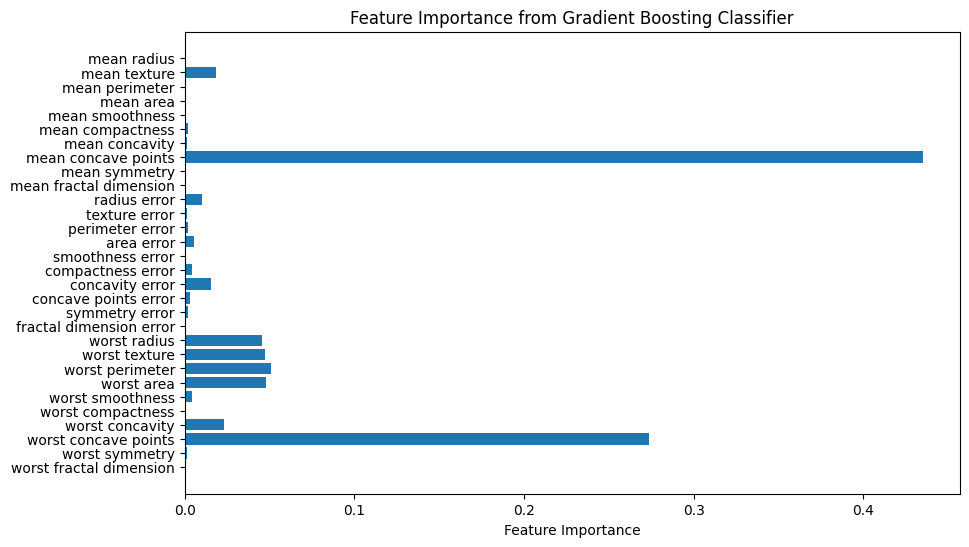

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target
feature_names = cancer_data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions (optional, you can check the accuracy if needed)
y_pred = gb_classifier.predict(X_test)

# Get the feature importances
feature_importances = gb_classifier.feature_importances_

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Visualize the feature importances (optional)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [4]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Calculate the R-Squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R-Squared Score: {r2:.4f}")


R-Squared Score: 0.7803


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [5]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Make predictions using the Gradient Boosting Classifier
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy of Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")

# Initialize the XGBoost Classifier
xg_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the XGBoost Classifier
xg_classifier.fit(X_train, y_train)

# Make predictions using the XGBoost Classifier
y_pred_xg = xg_classifier.predict(X_test)

# Calculate accuracy of XGBoost Classifier
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f"XGBoost Classifier Accuracy: {accuracy_xg:.4f}")


Gradient Boosting Classifier Accuracy: 1.0000
XGBoost Classifier Accuracy: 1.0000


19. Train a CatBoost Classifier and evaluate using F1-Score.

In [11]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
# Install catboost if it's not already installed
!pip install catboost
# Import CatBoostClassifier
from catboost import CatBoostClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, cat_features=[], verbose=0)

# Train the CatBoost Classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions using the CatBoost Classifier
y_pred = catboost_classifier.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance if any

# Print the F1-score
print(f"F1-Score: {f1:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
F1-Score: 1.0000


20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [12]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Regressor
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.2856


21.  Train an AdaBoost Classifier and visualize feature importance.

Feature Importances:
sepal length (cm): 0.0995
sepal width (cm): 0.1052
petal length (cm): 0.4703
petal width (cm): 0.3251


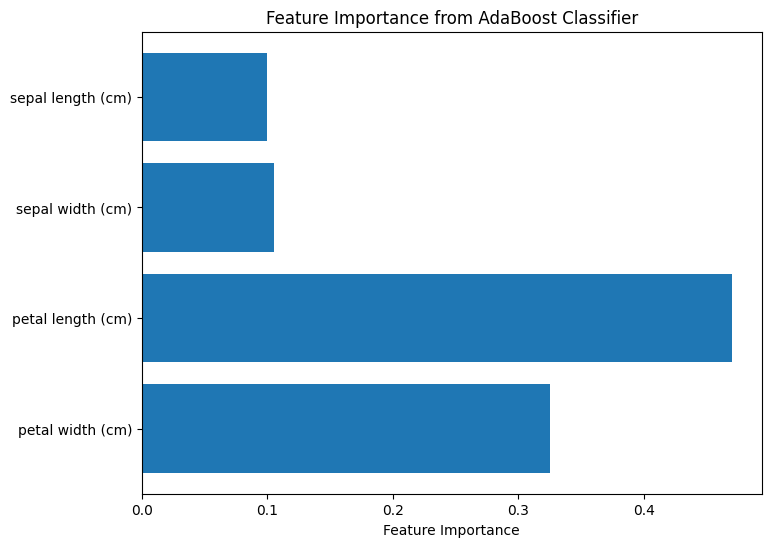

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost Classifier with a base decision tree classifier
# The 'base_estimator' argument has been replaced with 'estimator' in newer versions of scikit-learn
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the AdaBoost Classifier
ada_boost.fit(X_train, y_train)

# Get feature importances
feature_importances = ada_boost.feature_importances_

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from AdaBoost Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

22. Train a Gradient Boosting Regressor and plot learning curves.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# List to store training and testing errors
train_errors, test_errors = [], []

# Loop over different numbers of estimators (from 1 to 500)
for n_estimators in range(1, 501):
    gb_regressor.n_estimators = n_estimators

    # Train the model
    gb_regressor.fit(X_train, y_train)

    # Calculate the training and testing errors
    train_error = mean_squared_error(y_train, gb_regressor.predict(X_train))
    test_error = mean_squared_error(y_test, gb_regressor.predict(X_test))

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_errors, label='Training Error', color='blue')
plt.plot(range(1, 501), test_errors, label='Test Error', color='red')
plt.title('Learning Curves for Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()




### Expected Output:

- The plot will show how the **training error** decreases as the number of estimators increases (because the model gets better at fitting the training data).
- The **test error** will typically decrease at first, then level off or increase after a certain number of estimators, indicating potential overfitting.

### Example Plot:

The plot will have:
- **x-axis**: Number of estimators (from 1 to 500).
- **y-axis**: Mean Squared Error (MSE).
- Two curves: one for training error and one for test error.

The learning curve should look something like this:

```
   MSE
   ^
   |
   |      /----------- Test Error
   |     /         
   |    /      
   |   /        
   |  /         
   | /         
   |/_____________________
          Estimators
```


23. Train an XGBoost Classifier and visualize feature importance.

<Figure size 1000x600 with 0 Axes>

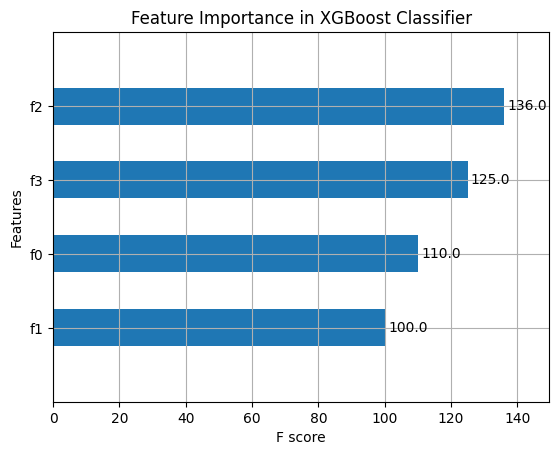

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier
xg_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the XGBoost Classifier
xg_classifier.fit(X_train, y_train)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plot_importance(xg_classifier, importance_type='weight', max_num_features=4, height=0.5)
plt.title('Feature Importance in XGBoost Classifier')
plt.show()


24. Train a CatBoost Classifier and plot the confusion matrix.

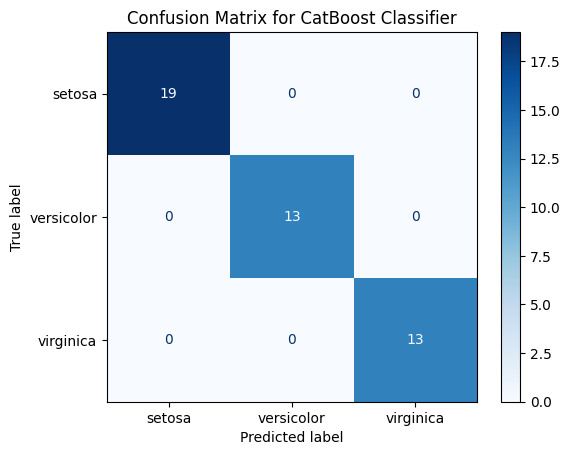

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import catboost as cb

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the CatBoost Classifier
catboost_classifier = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)

# Train the CatBoost Classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = catboost_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()


25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

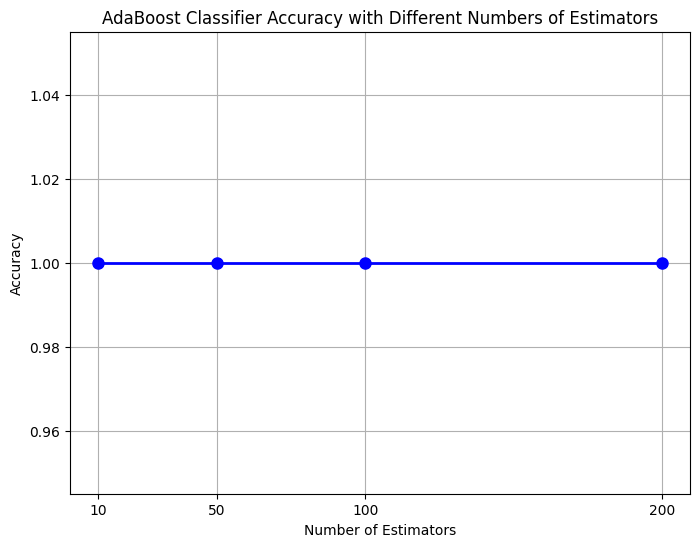

Accuracy with 10 estimators: 1.0000
Accuracy with 50 estimators: 1.0000
Accuracy with 100 estimators: 1.0000
Accuracy with 200 estimators: 1.0000


In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of estimators to test
estimators_list = [10, 50, 100, 200]

# List to store accuracy scores for each number of estimators
accuracy_scores = []

# Train AdaBoost Classifier for different numbers of estimators
for n_estimators in estimators_list:
    # Initialize the AdaBoost Classifier with the current number of estimators
    # Change 'base_estimator' to 'estimator'
    ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                  n_estimators=n_estimators, random_state=42)

    # Train the classifier
    ada_boost.fit(X_train, y_train)

    # Make predictions
    y_pred = ada_boost.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different numbers of estimators
plt.figure(figsize=(8, 6))
plt.plot(estimators_list, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('AdaBoost Classifier Accuracy with Different Numbers of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(estimators_list)
plt.grid(True)
plt.show()

# Print the accuracy scores
for n_estimators, accuracy in zip(estimators_list, accuracy_scores):
    print(f"Accuracy with {n_estimators} estimators: {accuracy:.4f}")

26. Train a Gradient Boosting Classifier and visualize the ROC curve.

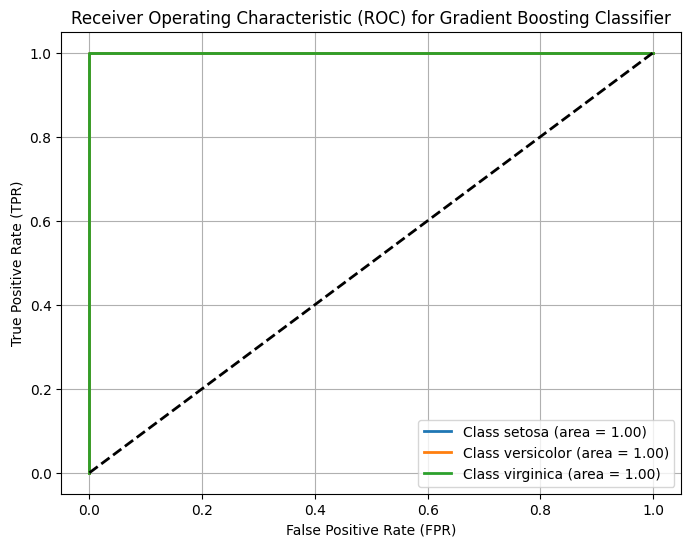

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
n_classes = len(np.unique(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_prob = gb_classifier.predict_proba(X_test)

# Binarize the output labels for ROC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for all classes
plt.figure(figsize=(8, 6))

# Plot all ROC curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

# Plot the diagonal (chance line)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) for Gradient Boosting Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Regressor
xg_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Define the parameter grid for tuning the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
}

# Set up GridSearchCV to tune the learning rate
grid_search = GridSearchCV(estimator=xg_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Perform GridSearchCV to find the best learning rate
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best learning rate: {grid_search.best_params_['learning_rate']}")

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best learning rate: 0.2
Mean Squared Error (MSE): 0.2153
R-squared (R2) Score: 0.8360


28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

Classification Report for Model without Class Weights:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       275
           1       0.76      0.76      0.76        25

    accuracy                           0.96       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.96      0.96      0.96       300


Classification Report for Model with Class Weights:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       275
           1       0.58      0.84      0.69        25

    accuracy                           0.94       300
   macro avg       0.78      0.89      0.83       300
weighted avg       0.95      0.94      0.94       300



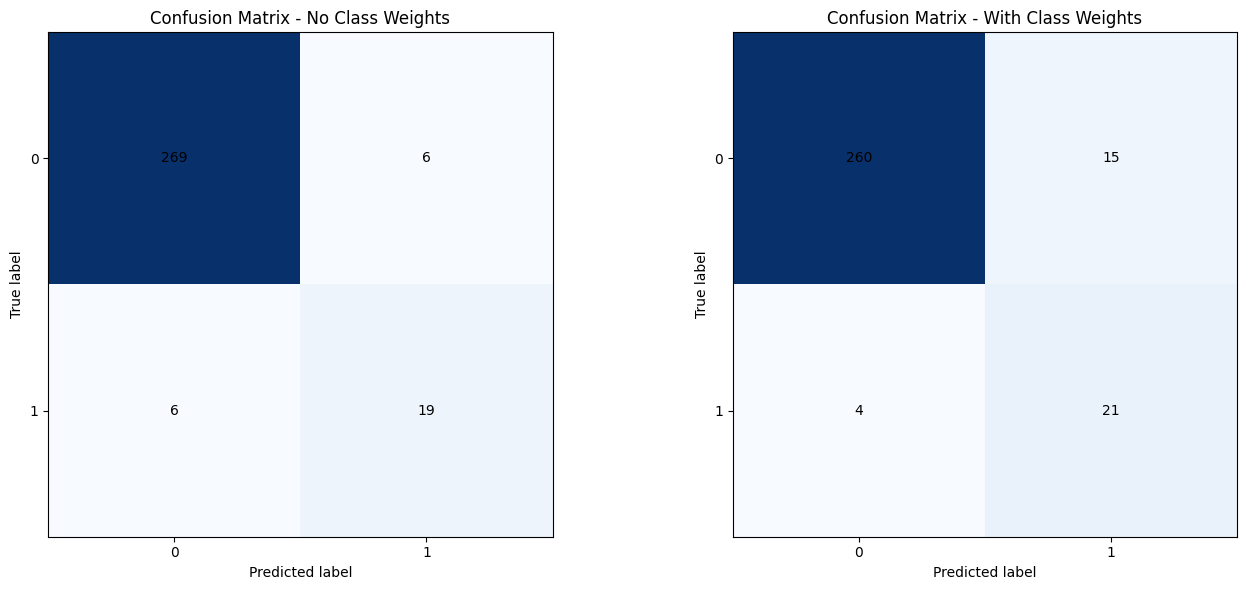

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import catboost as cb
from catboost import CatBoostClassifier

# Create an imbalanced dataset using make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the CatBoost Classifier without class weights
catboost_classifier_no_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)

# Train the model without class weights
catboost_classifier_no_weights.fit(X_train, y_train)

# Make predictions without class weights
y_pred_no_weights = catboost_classifier_no_weights.predict(X_test)

# Initialize the CatBoost Classifier with class weights
catboost_classifier_with_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3,
                                                      class_weights=[1, 10], verbose=0)

# Train the model with class weights
catboost_classifier_with_weights.fit(X_train, y_train)

# Make predictions with class weights
y_pred_with_weights = catboost_classifier_with_weights.predict(X_test)

# Evaluate both models using classification report
print("Classification Report for Model without Class Weights:")
print(classification_report(y_test, y_pred_no_weights))

print("\nClassification Report for Model with Class Weights:")
print(classification_report(y_test, y_pred_with_weights))

# Confusion Matrix
cm_no_weights = confusion_matrix(y_test, y_pred_no_weights)
cm_with_weights = confusion_matrix(y_test, y_pred_with_weights)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for model without class weights
axes[0].imshow(cm_no_weights, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title("Confusion Matrix - No Class Weights")
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_xticks(np.arange(2))
axes[0].set_yticks(np.arange(2))
axes[0].set_xticklabels([0, 1])
axes[0].set_yticklabels([0, 1])
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_no_weights[i, j], ha="center", va="center", color="black")

# Plot confusion matrix for model with class weights
axes[1].imshow(cm_with_weights, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title("Confusion Matrix - With Class Weights")
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_xticks(np.arange(2))
axes[1].set_yticks(np.arange(2))
axes[1].set_xticklabels([0, 1])
axes[1].set_yticklabels([0, 1])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, cm_with_weights[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

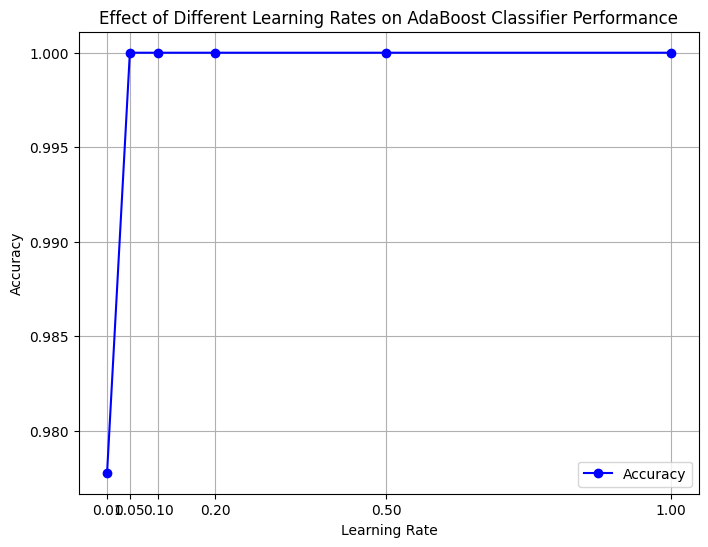

In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a base decision tree classifier (weak learner) for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Different learning rates to analyze
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

# List to store accuracy scores for each learning rate
accuracy_scores = []

# Train AdaBoost Classifiers with different learning rates
for lr in learning_rates:
    # Initialize AdaBoost with the current learning rate
    # Use 'estimator' instead of 'base_estimator'
    ada_boost_classifier = AdaBoostClassifier(estimator=base_estimator, learning_rate=lr, n_estimators=50, random_state=42)

    # Train the model
    ada_boost_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = ada_boost_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the effect of learning rates on accuracy
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Effect of Different Learning Rates on AdaBoost Classifier Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.grid(True)
plt.legend()
plt.show()

30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [29]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from xgboost import XGBClassifier

# Load the Iris dataset (a multi-class classification problem)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier for multi-class classification
xgb_classifier = XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict the class probabilities for the test set
y_pred_prob = xgb_classifier.predict_proba(X_test)

# Evaluate the model using log-loss
logloss = log_loss(y_test, y_pred_prob)

print(f'Log-Loss: {logloss:.4f}')


Log-Loss: 0.0100
